**Percobaan 1 : Penerapan Metode Fuzzy Sugeno dengan bahasa Python**

Terdapat dua buah variable input untuk studi kasus yang diambil pada jobsheet kali ini. Variabel input berupa kualitas makanan, dan kualitas pelayanan makanan akan menentukan output berupa jumlah tip yang diberikan dalam poin prosentase. Fungsi keanggotaan untuk studi kasus berikut akan dibagi menjadi tinggi, sedang, dan rendah.

In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 12.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=159d4edafcd607ca388f3a65047d96382a28d43c9bb7f224c0b07d840f2a24c5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


17.075000000000003


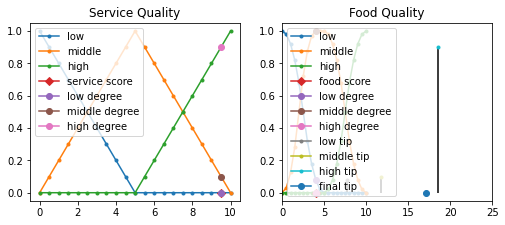

In [ ]:
"""-----------------------------------------------------------------------------
Untuk dapat membuat program fuzzy dengan Python diperlukan beberapa 
import library sebagai berikut
-----------------------------------------------------------------------------"""
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

"""-----------------------------------------------------------------------------
Tahap selanjutnya generate variable global. Untuk variable input kualitas makanan 
dan kualitas pelayanan berada pada rentang subjektif antara 0 sampai 10. Sedangkan 
untuk variable output yaitu tip berada pada rentang subjektif antara 0 sampai 25. 
-----------------------------------------------------------------------------"""
#Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 10.01, 0.5)
x_food    = np.arange(0, 10.01, 0.5)
x_tip     = np.arange(0, 25.01, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

food_low = fuzz.zmf(x_food, 0, 5)
food_middle = fuzz.pimf(x_food, 0, 4, 5, 10)
food_high = fuzz.smf(x_food, 5, 10)

"""-----------------------------------------------------------------------------
Pada Fuzzy Sugeno Aturan yang digunakan adalah sebagai berikut :
a. Jika kualitas makanan buruk ATAU kualitas pelayanan buruk, maka tip yang diberikan akan rendah
        #Tip rendah = 5 + kualitas pelayanan * 0.2 + kualitas makanan * 0.2
b. Jika kualitas pelayanan dapat diterima, maka tip yang diberikan berada pada tingkat menengah
        #Tip menengah = 5 + kualitas pelayanan * 0.5 + kualitas makanan * 0.5
c. Jika kualitas makanan enak ATAU kualitas pelayanan luar biasa, maka tip yang diberikan akan tinggi.
        #Tip tinggi : 5 + kualitas pelayanan * 1 + kualitas makanan * 1

Pada percobaan ke-1 kali ini akan dilakukan pengujian aturan Fuzzy dengan memberikan 
nilai 4.0 untuk kualitas makanan dan 9.5 untuk kualitas pelayanan. Sesuai dengan kode 
program di bawah ini.
-----------------------------------------------------------------------------"""
#input: Service score and food score
service_score = 9.5
food_score = 4.0

service_low_degree = fuzz.interp_membership(x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

"""-----------
VISUALISASI
-----------"""
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("Service Quality")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(service_score, 0.0, label="service score", marker="D")
plt.plot(service_score, service_low_degree, label="low degree", marker="o")
plt.plot(service_score, service_middle_degree, label="middle degree", marker="o")
plt.plot(service_score, service_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_middle, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

"""---------------------------------------------------
Selanjutnya mencari nilai aktivasi berdasarkan aturan
---------------------------------------------------"""
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

"""---------------------------------------------------
Melakukan Defuzzifikasi dengan mencari rata-rata
---------------------------------------------------"""
# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

"""---------------------------------------------------
Melakukan Visualisasi singleton
---------------------------------------------------"""
plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")

# **Pertanyaan**

---

1.) Berdasarkan percobaan yang telah dilakukan jika diberikan nilai 4.0 untuk kualitas makanan dan 9.5 untuk kualitas layanan. Berapakah tip yang diberikan?

**Jawab:**
> *berdasarkan perhitungan dari proses defuzzifikasi yaitu 17.075000000000003*

2.) Jelaskan maksud dari kode program berikut ini dan Jenis Fungsi keanggotaan apa yang digunakan pada kode program !

<img src="https://user-images.githubusercontent.com/64578787/133883794-24c996fd-e2a7-4d63-8b6f-d56b589600fa.png" width="400">  
**Jawab:**
> *Melakukan generate membership function untuk variabel 'service' dan 'food' yang ada pada rentang rendah, sedang, dan tinggi.*

3.) Jelaskan maksud dari kode program defuzzyfikasi berikut!
 
<img src="https://user-images.githubusercontent.com/64578787/134500966-d63907a2-e058-4e7f-991f-ec0e8516fd19.png" width="400">
 
**Jawab:**
> *Terdapat inisialisasi variabel untuk rentan nilai rendah, sedang, dan tinggi. Selanjutnya nilai input akan diproses melalui inferensi yang kemudian hasil dari proses inferensi tersebut dihitung melalui persamaan yang merupakan perhitungan dari proses defuzzifikasi.*